In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x, y ,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

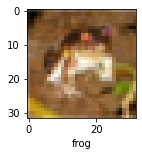

In [7]:
plot_sample(x_train, y_train, 0)

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
ann = models. Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = "relu"),
    layers.Dense(1000,activation = "relu"),
    layers.Dense(10, activation = "sigmoid")
])

ann.compile(optimizer = "sgd",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

ann.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8096 - accuracy: 0.3556
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6242 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5394 - accuracy: 0.4585
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4823 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4326 - accuracy: 0.4973


In [22]:
cnn = models. Sequential([
    
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

cnn.compile(optimizer = "sgd",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0602 - accuracy: 0.2527
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6705 - accuracy: 0.4021
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4710 - accuracy: 0.4714
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3720 - accuracy: 0.5107
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2965 - accuracy: 0.5418
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2309 - accuracy: 0.5668
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1722 - accuracy: 0.5875
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1175 - accuracy: 0.6112
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0685 - accuracy: 0.6311
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.023

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0663 - accuracy: 0.6320


[1.0662773847579956, 0.6320000290870667]

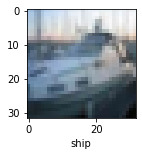

In [36]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test, 2)

In [25]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.77464765e-02, 4.26432875e-04, 1.40295103e-01, 5.07712781e-01,
        9.88853443e-03, 2.25156888e-01, 9.37856883e-02, 1.11725146e-03,
        3.64922872e-03, 2.21568611e-04],
       [1.01410374e-01, 3.81754071e-01, 9.79075790e-04, 1.34848422e-04,
        9.42409679e-05, 9.45323882e-06, 6.32717201e-05, 2.93810972e-05,
        4.82515156e-01, 3.30100991e-02],
       [6.23842999e-02, 1.91826448e-01, 6.26885798e-03, 4.90947487e-03,
        2.16735294e-03, 8.32972641e-04, 3.18299048e-04, 1.58881175e-03,
        6.68986559e-01, 6.07168786e-02],
       [5.84179878e-01, 2.47427449e-02, 5.13582379e-02, 4.79564955e-03,
        9.76671744e-03, 2.08313606e-04, 5.96964557e-04, 5.83163463e-04,
        3.21803480e-01, 1.96486269e-03],
       [4.90091101e-04, 7.48867024e-05, 4.51490171e-02, 1.04601637e-01,
        6.74144030e-01, 2.04207413e-02, 1.53272182e-01, 1.06960675e-03,
        5.08947705e-04, 2.68871780e-04]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred ]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
classes[y_classes[3]]

'airplane'